In [1]:
import sys
import glob
import os
import re
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick
%matplotlib inline

In [29]:
def process_line(line):
    if line[:3] == "no-":
        parts = line.split("_")
        parts = map(lambda p: p.split("-"), parts)
        parts = [(k, v if k == 'q' else int(float(v))) for k,v in parts]
        return { k:v for k,v in parts}
    return None

def load_trace(fn):
    with open(fn, 'r') as f:
        results = filter(None, map(process_line, f.readlines()))
        return pd.DataFrame(results)

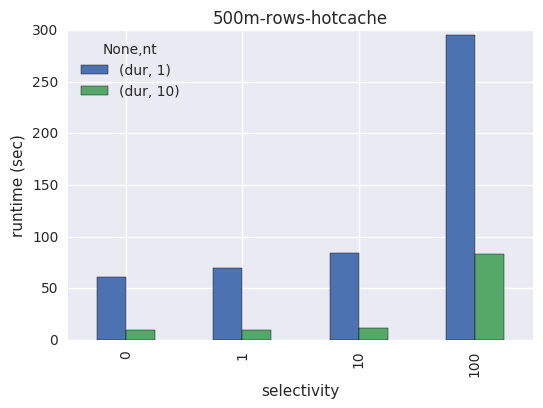

In [136]:
def plot_500m():
    df = load_trace('500m_results/run.log')
    del df['no']
    del df['q']
    del df['ep']
    del df['run']
    ax = df.groupby(['sel', 'nt']).mean().unstack(level=-1).plot.bar()
    ax.set_title('500m-rows-hotcache')
    ax.set_ylabel('runtime (sec)')
    ax.set_xlabel('selectivity')
plot_500m()

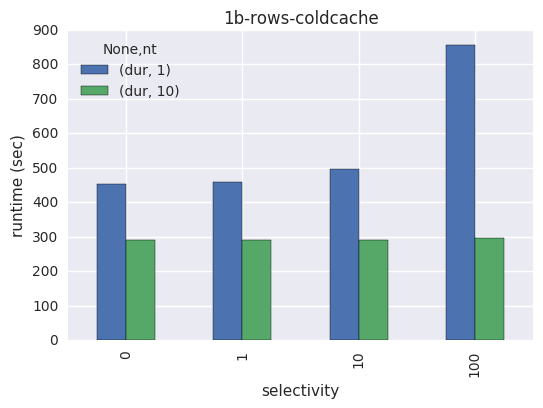

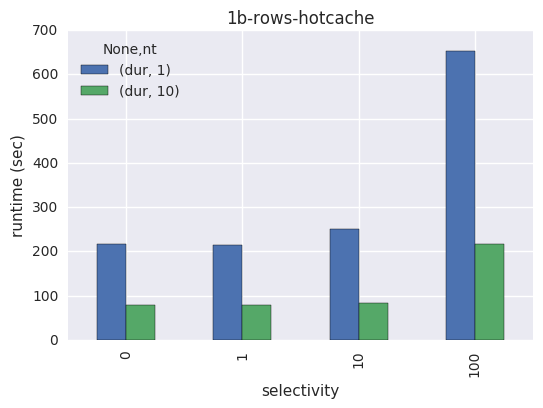

In [135]:
df = load_trace('1b_results/run.log')
del df['no']
del df['ep']
del df['q']
del df['run']

cc = df[df.coldcache == 1]
del cc['coldcache']
cc_ax = cc.groupby(['sel', 'nt']).mean().unstack(-1).plot.bar()
cc_ax.set_title('1b-rows-coldcache')
cc_ax.set_ylabel('runtime (sec)')
cc_ax.set_xlabel('selectivity')

hc = df[df.coldcache == 0]
del hc['coldcache']
hc_ax = hc.groupby(['sel', 'nt']).mean().unstack(-1).plot.bar()
hc_ax.set_title('1b-rows-hotcache')
hc_ax.set_ylabel('runtime (sec)')
hc_ax.set_xlabel('selectivity')